In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mpltex

In [3]:
# defining constants
Ti = 100
T_inf = 25
M = 21

In [4]:
dx = 1.0/(M-1)
dt  = 1.24e-3

In [5]:
# function to solve the problem using FTCS
def solve_T_FTCS(M, dt, Fo, Bi):
    
    dx = 1.0/(M-1)
    t_steps = int(Fo/dt)

    # defining the grid
    x = np.linspace(0,1,M)
    T = np.zeros((M, t_steps))

    # initial condition
    T[:,0] = 1.0

    # solving the problem
    for n in range(1, t_steps):
        for i in range(1, M-1):
            T[i,n] = T[i,n-1] + dt*(T[i+1,n-1] - 2*T[i,n-1] + T[i-1,n-1])/(dx**2)

        # boundary conditions
        T[0, n] = T[1, n]
        T[-1, n] = T[-2, n] / (1 + Bi*dx)

    return T

In [6]:
# dict to store c1, c2 corresponding to different Bi
# c1_c2 = {
#     0.2: (1.0311, 0.4328), 
#     1  : (1.1191, 0.8603),
#     5  : (1.2402, 1.3138),
#     10 : (1.4289, 1.2620),
# }

# def analytical_solution(M, Bi, Fo):
#     x = np.linspace(0,1,M)
#     c1 = c1_c2[Bi][0]
#     c2 = c1_c2[Bi][1]
#     theata_o = c1 * np.exp(-c2*c2*Fo)
#     # theata_o = 1.0
#     theata = theata_o * np.cos(c2*x)
#     return theata

## Que 1 (a)

In [7]:
# Analytical solution
time_steps = [0.2, 0.4, 0.6, 0.8, 1.0]
heisler_char_values = np.array([
    [0.99, 0.96, 0.91, 0.89, 0.86], 
    [0.96, 0.84, 0.72, 0.62, 0.54], 
    [0.93, 0.64, 0.44, 0.29, 0.24], 
    [0.82, 0.52, 0.33, 0.28, 0.18]
])

In [29]:
def plot_T_at_xo_Bi(M, dt, Fo, Bi_s, xo=0, step=25, name='Plot_1.png'):
    fig, ax = plt.subplots(1, figsize=(9, 6))
    linestyles = mpltex.linestyle_generator()
    for Bi in Bi_s:
        T = solve_T_FTCS(M, dt, Fo, Bi)
        t = np.linspace(0, Fo, int(Fo/dt))
        ax.plot(t[::step], T[xo,:][::step], label=f'Bi = {Bi}', **next(linestyles))
        ax.plot(time_steps, heisler_char_values[Bi_s.index(Bi)], label=f'Bi = {Bi} analytical', **next(linestyles))
    ax.set_xlabel('Time')
    ax.set_ylabel(f'Temperature at x = {xo}')
    ax.set_title(f'Temperature at x = {xo} with time for Fo = {Fo}')
    ax.legend()
    fig.tight_layout()
    fig.savefig(name)

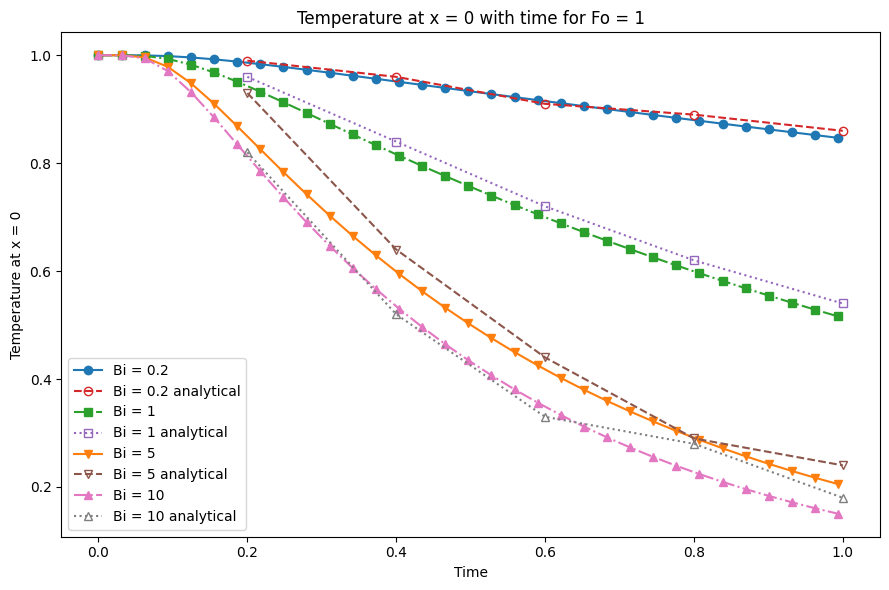

In [30]:
plot_T_at_xo_Bi(M, dt, 1, [0.2, 1, 5, 10], 0, 25, name='Plot_1.png')

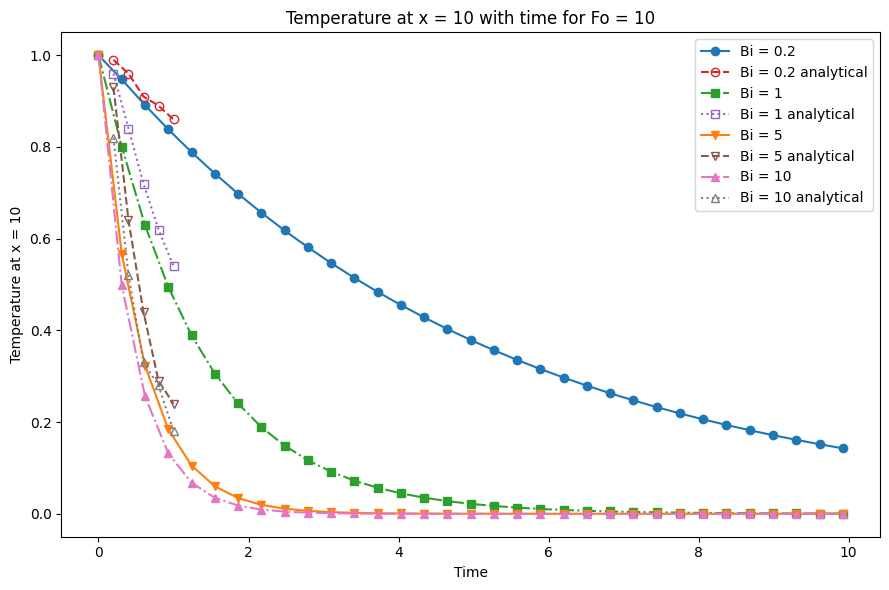

In [31]:
plot_T_at_xo_Bi(M, dt, 10, [0.2, 1, 5, 10], 10, 250, name='Plot_1_1.png')

## Que 1 (b)

In [32]:
b_i = [0.2, 1, 5, 10]
heisler_char_values_2 = np.array([
    [0.647, 0.201, 0.023, 0.013], 
    [0.426, 0.0412, 0.0007, 0.00015]
])

In [35]:
def plot_T_at_xo_with_Bi(M, dt, Fo, Bi_s, xo=0.5):
    fig, ax = plt.subplots(1, figsize=(9, 6))
    # fig.subplots_adjust(0,0,1,1,0,0)
    linestyles = mpltex.linestyle_generator()
    for fo in Fo:
        T_xo = []
        for Bi in Bi_s:
            T = solve_T_FTCS(M, dt, fo, Bi)
            T_xo.append(T[int(xo/(1/(M-1))), -1])
        ax.plot(Bi_s, T_xo, label=f'Fo = {fo}', **next(linestyles))
        ax.plot(Bi_s, heisler_char_values_2[Fo.index(fo)], label=f'Fo = {fo} analytical', **next(linestyles))
    ax.set_xlabel('Bi')
    ax.set_ylabel(f'Temperature at x = {xo}')
    ax.set_title(f'Temperature at x = {xo} with Bi')
    ax.legend()
    fig.tight_layout(h_pad=0.5, w_pad=0.5)
    fig.savefig('Plot_2.png')

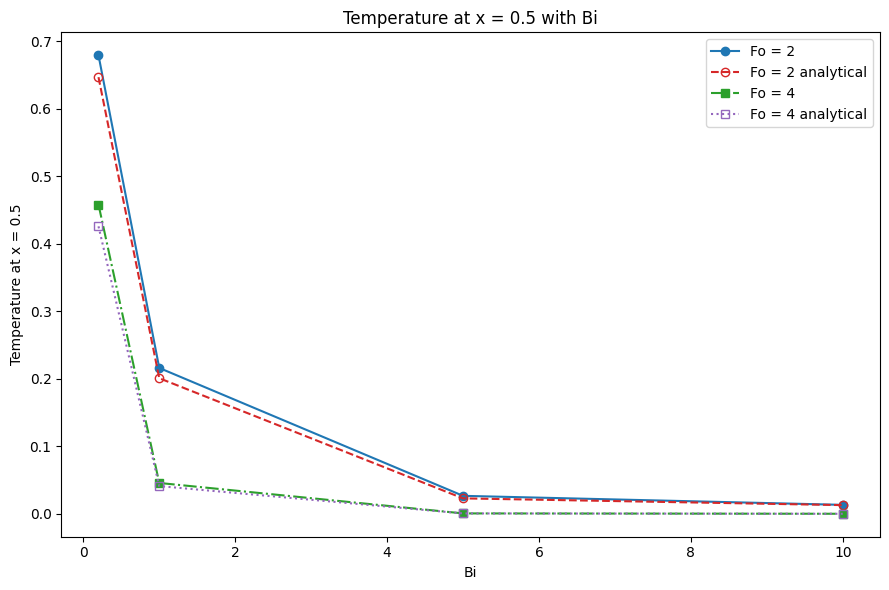

In [36]:
# plot the T at x=0.5 with Bi = 0.2, 1, 5, 10 given Fo = 2, 4
plot_T_at_xo_with_Bi(M, dt, [2, 4], [0.2, 1, 5, 10], xo=0.5)